# SALES PREDICTION

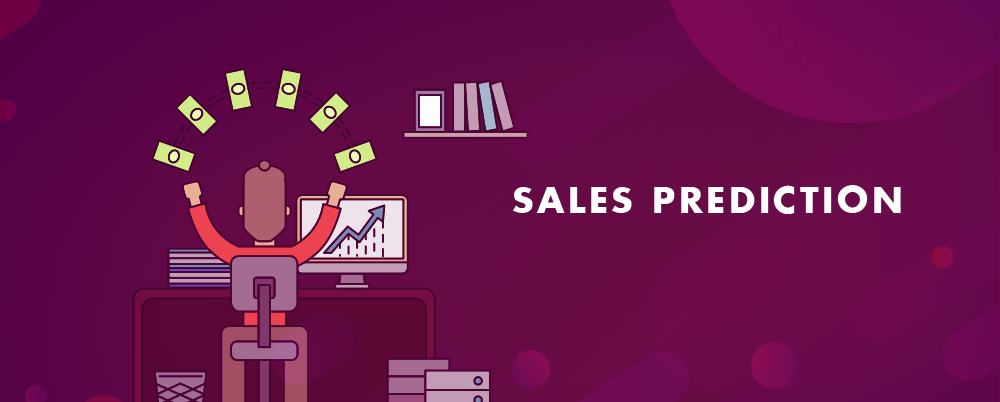

In [261]:
from IPython.display import Image
img = 'sales.PNG' 
Image(filename=img)

## Importing necessary libraries and Dataset

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [263]:
df = pd.read_csv("advertising.csv")

## Exploratory Data Analysis

In [264]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [265]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Statistic Summary of the Data

In [267]:
df.shape

(200, 5)

In [268]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Let's check for null values

In [269]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


## Drop Null Values

In [270]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

The data is cleaned now! ready for transformation

## Feature Engineering

In [271]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Dropping Unnecesssary Columns

In [272]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [273]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Data Visualization

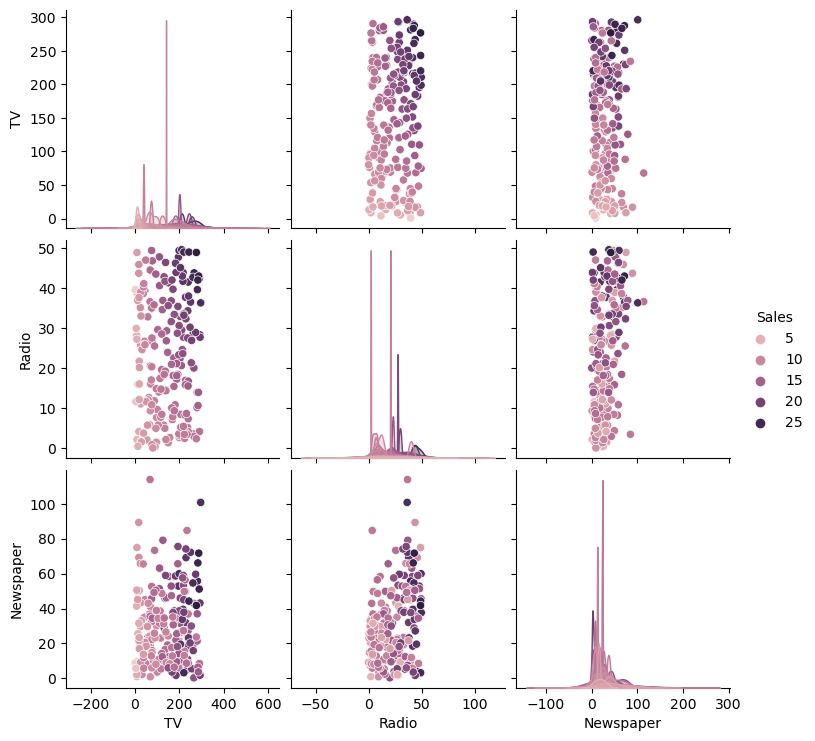

In [274]:
#Visualization 1
sns.pairplot(data=df, hue= 'Sales', diag_kind= 'kde')

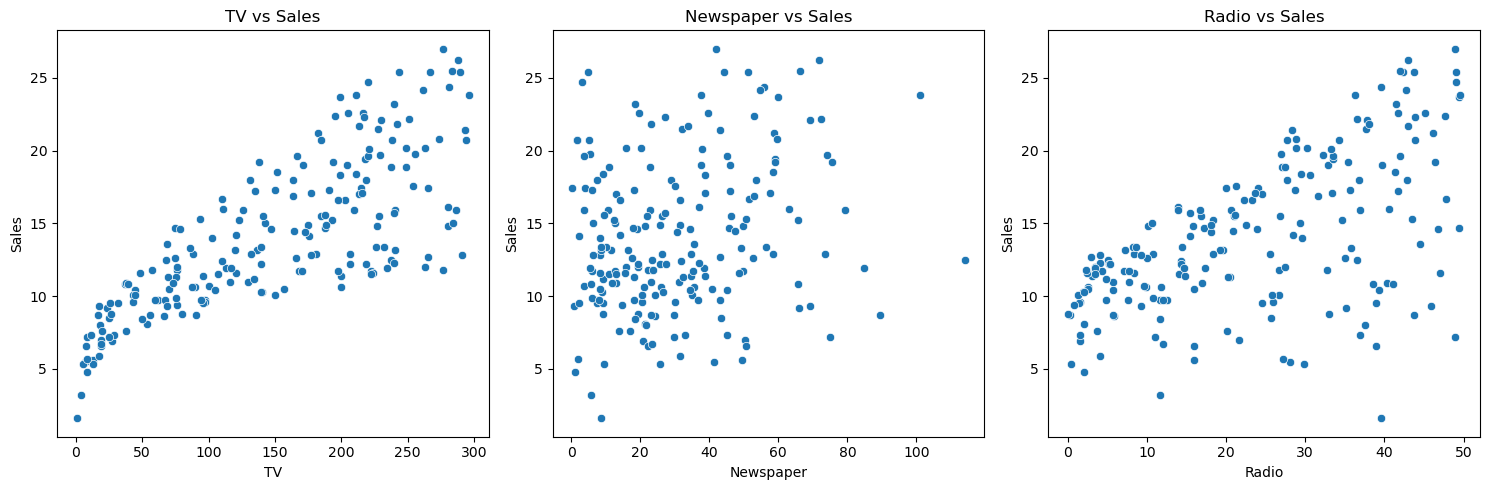

In [275]:
#Visualization 2
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.tight_layout()
plt.show()

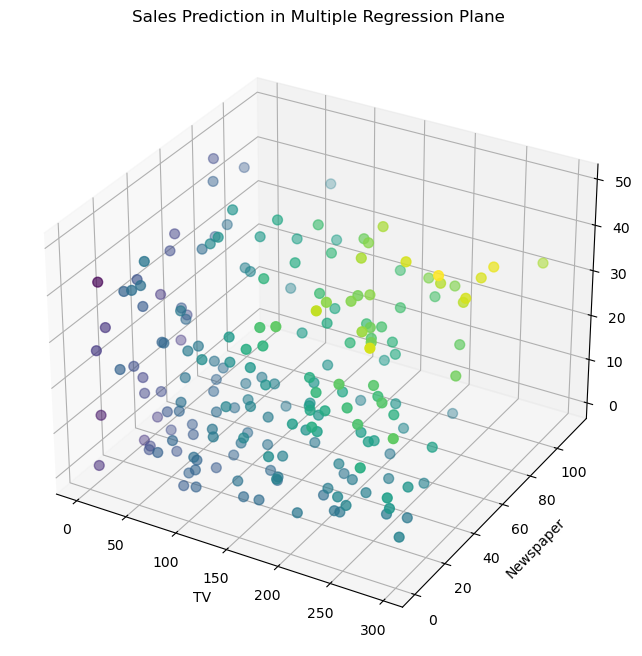

In [276]:
#Visualization 3
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Newspaper'], df['Radio'], c=df['Sales'], cmap='viridis', s=50)
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Radio')
ax.set_title('Sales Prediction in Multiple Regression Plane')

plt.show()

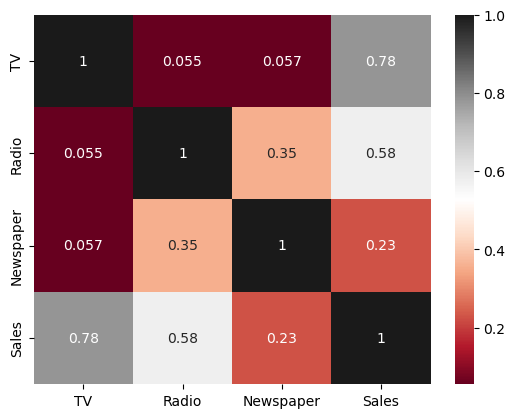

In [277]:
# Visualization 4
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdGy')
plt.show()

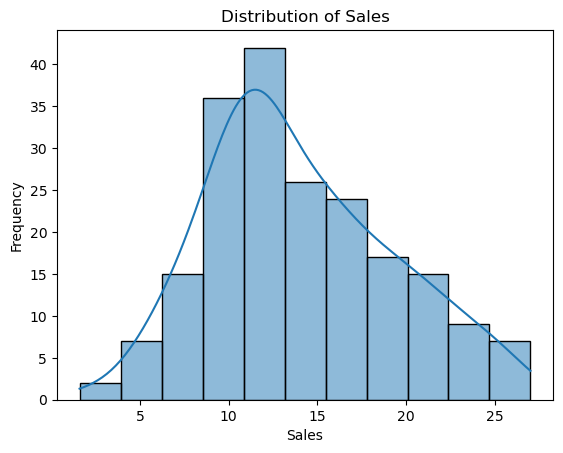

In [278]:
# Visualization 5
sns.histplot(df['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

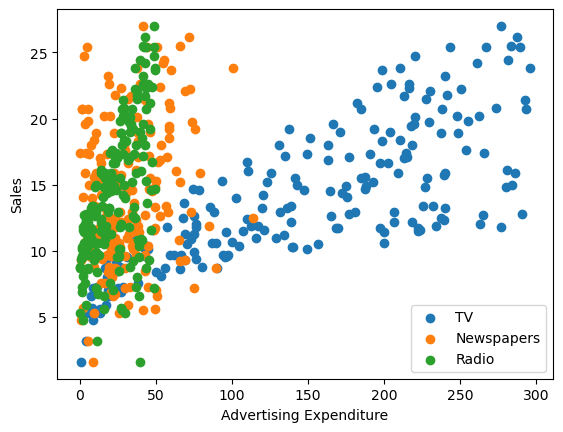

In [279]:
# Visualization 6
plt.scatter(df['TV'], df['Sales'], label='TV')
plt.scatter(df['Newspaper'], df['Sales'], label='Newspapers')
plt.scatter(df['Radio'], df['Sales'], label='Radio')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.show()

## MODEL SELECTION

### Defining the Feature Matrix

In [280]:
x = df.iloc[:,0:-1] # independent variable
y = df.iloc[:,-1] #dependent variable

### Model Building and Evaluation

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn import metrics

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## MODEL TRAINING

## 1. Linear Regression

In [282]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# training model
linreg.fit(x_train,y_train)

#Model summary
y_pred_linreg = linreg.predict(x_test)
r_squared_lr = r2_score(y_test,y_pred_linreg)
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_linreg))
mse_lr = metrics.mean_squared_error(y_test, y_pred_linreg)

print("R_squared :",r_squared_lr*100)
print("RMSE :",rmse_lr)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linreg))
print('MSE:', mse_lr)

R_squared : 85.98552596599053
RMSE : 2.236735157785631
MAE: 1.497557863719524
MSE: 5.002984166074313


In [295]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Training Random Forest model
rf_model.fit(x_train, y_train)

#Model summary
y_pred_rf = rf_model.predict(x_test)
r_squared_rf = r2_score(y_test,y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)

print("R_squared :",r_squared_rf*100)
print("RMSE :",rmse_rf)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE:',mse_rf )

R_squared : 95.5306217611954
RMSE : 1.2631348502832132
MAE: 0.8616500000000002
MSE: 1.5955096499999954


## 3. Gradient Boosting Regressor

In [296]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Train Gradient Boosting model
gb_model.fit(x_train, y_train)

#Model Summary
gb_pred = gb_model.predict(x_test)
r_squared_gb = r2_score(y_test,gb_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test,gb_pred))
mse_gb = metrics.mean_squared_error(y_test, gb_pred)

print("R_squared :",r_squared_gb*100)
print("RMSE :",rmse_gb)
print('MAE:', metrics.mean_absolute_error(y_test,gb_pred))
print('MSE:', mse_gb)

R_squared : 96.18111947497819
RMSE : 1.167600301175847
MAE: 0.7116253275910909
MSE: 1.3632904633059284


## Model Evaluation

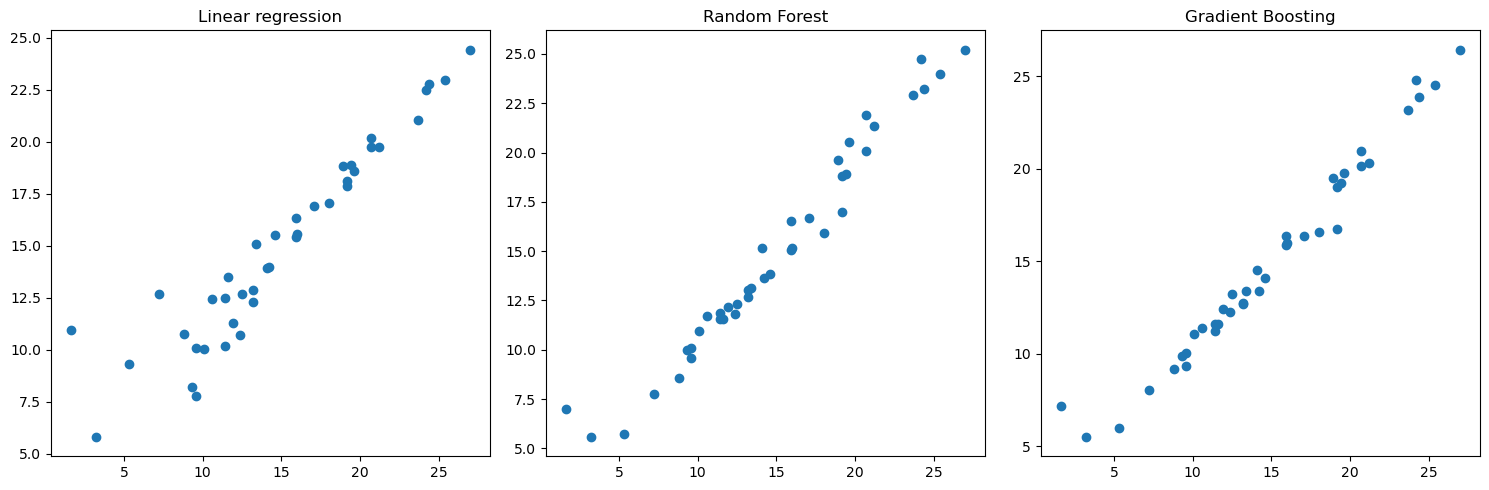

In [297]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test,y_pred_linreg)
plt.title('Linear regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test,y_pred_rf)
plt.title('Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(y_test,gb_pred)
plt.title('Gradient Boosting')

plt.tight_layout()
plt.show()

## Conclusion :

In this study, we employed the Gradient Boosting Regressor, a powerful machine learning algorithm, to predict sales based on advertising expenditures in TV, newspapers, and radio. The analysis aimed to uncover insights into the relationship between advertising channels and sales, and to develop a robust predictive model.

## Model Performance:

In [300]:
# Compare MSE values
print(f"Random Forest MSE: {metrics.mean_squared_error(y_test, y_pred_rf)}")
print(f"Gradient Boosting MSE: {metrics.mean_squared_error(y_test, gb_pred)}")

# Choose the model with the lowest MSE
best_model = rf_model if mse_rf < mse_gb else gb_model
best_model

Random Forest MSE: 1.5955096499999954
Gradient Boosting MSE: 1.3632904633059284


GradientBoostingRegressor()

## Feature Importance:

The feature importance analysis revealed that TV advertising expenditure was the most influential factor in predicting sales, followed by radio and newspapers. This insight provides valuable guidance for marketing strategies, suggesting a stronger focus on TV advertising to maximize sales impact.

In conclusion, the Random Forest Regressor provides a robust framework for sales prediction, offering valuable insights into the dynamics between advertising expenditures and sales. The results presented here serve as a foundation for informed decision-making and can guide future marketing strategies to optimize sales outcomes.

# THANK YOU